In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df = pd.read_csv('/work/kost.csv')
df.head()


,nama,fasilitas,harga
0,Kost Apik Muh Unpar Tipe B Cidadap Bandung 296...,3 x 3 meter+Tidak termasuk listrik+Kasur+Meja+...,975000
1,Kost Apik Ciumbuleuit 1 Tipe A Cidadap Bandung...,3 x 3 meter+Termasuk listrik+Kasur+Meja+Lemari...,725000
2,Kost Apik Theresia Home UNPAR Tipe A Cidadap B...,3 x 3 meter+Termasuk listrik+Kasur+Meja+Lemari...,1875000
3,Kost Singgahsini Bukit Indah UNPAR Tipe B Cium...,3.5 x 3.5 meter+Tidak termasuk listrik+Kasur+M...,1325000
4,Kost Apik Tirtasari Selatan Tipe A Sukasari Ba...,4 x 4 meter+Termasuk listrik+Kasur+Meja+Ventil...,1275000


In [3]:
# Extract dimensi
df['dimensions'] = df['fasilitas'].str.extract(r'^(\d+\.?\d*\s*x\s*\d+\.?\d*\s*meter)')  # Regex to include decimal points

# Split dimensi menjadi panjang dan lebar, tipe datanya float
df[['panjang', 'lebar']] = df['dimensions'].str.extract(r'(\d+\.?\d*)\s*x\s*(\d+\.?\d*)').astype(float)
df.drop(columns=['dimensions'], inplace=True)  # Clean up temporary column

# Explode amenities into separate columns
# Splitting the amenities after the dimensions
df['amenities'] = df['fasilitas'].apply(lambda x: x.split('+')[1:])  # Exclude the dimension part

# Get all unique amenities to create columns
all_amenities = set()
df['amenities'].apply(all_amenities.update)

# Create binary columns for each amenity
for amenity in all_amenities:
    df[amenity.strip()] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)

df.drop(columns=['amenities'], inplace=True)  # Clean up temporary list column

# Display the DataFrame to check the new columns
df

,nama,fasilitas,harga,panjang,lebar,Kloset Duduk,Bathtub,Laundry,Jemuran,Guling,...,Taman,Shower,Balcon,Ember mandi,Kursi,Wastafel,Parkir Mobil,Termasuk listrik,Jual Makanan,TV
0,Kost Apik Muh Unpar Tipe B Cidadap Bandung 296...,3 x 3 meter+Tidak termasuk listrik+Kasur+Meja+...,975000,3.0,3.0,0,0,0,1,1,...,1,1,0,0,1,0,0,0,0,0
1,Kost Apik Ciumbuleuit 1 Tipe A Cidadap Bandung...,3 x 3 meter+Termasuk listrik+Kasur+Meja+Lemari...,725000,3.0,3.0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,Kost Apik Theresia Home UNPAR Tipe A Cidadap B...,3 x 3 meter+Termasuk listrik+Kasur+Meja+Lemari...,1875000,3.0,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,Kost Singgahsini Bukit Indah UNPAR Tipe B Cium...,3.5 x 3.5 meter+Tidak termasuk listrik+Kasur+M...,1325000,3.5,3.5,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,Kost Apik Tirtasari Selatan Tipe A Sukasari Ba...,4 x 4 meter+Termasuk listrik+Kasur+Meja+Ventil...,1275000,4.0,4.0,1,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Kost Sapphire Setiabudi Tipe C Parongpong Band...,3 x 4 meter+Termasuk listrik+Kasur+Lemari Baju...,1200000,3.0,4.0,1,0,1,0,1,...,0,1,0,1,0,1,1,1,0,1
516,Kost Ma Maison Tipe Standar Parongpong Bandung...,3 x 5 meter+Tidak termasuk listrik+Kasur+Meja+...,1500000,3.0,5.0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
517,Kost Ananda House Sukasari Bandung 261598AH,3 x 3 meter+Tidak termasuk listrik+Kasur+Lemar...,1500000,3.0,3.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
518,Kost Alfi Tipe A Cidadap Bandung LC0241ZH,3.5 x 3.5 meter+Tidak termasuk listrik+Kasur+M...,800000,3.5,3.5,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [7]:
# Function to determine if a column should be dropped
def should_drop_column(col):
    # Calculate the highest frequency of any single value in the column
    frequency = col.value_counts(normalize=True).max()  # normalize=True gives the proportion rather than the count
    # Check if the most common value occupies more than 95% of the column
    return frequency > 0.95

# Apply the function to each column and drop those where condition is True
columns_to_drop = [col for col in df.columns if should_drop_column(df[col])]
df.drop(columns=columns_to_drop, inplace=True)

# Display the modified DataFrame
df

,nama,fasilitas,harga,panjang,lebar,Kloset Duduk,Laundry,Jemuran,Guling,WiFi,...,Taman,Shower,Balcon,Ember mandi,Kursi,Wastafel,Parkir Mobil,Termasuk listrik,Jual Makanan,TV
0,Kost Apik Muh Unpar Tipe B Cidadap Bandung 296...,3 x 3 meter+Tidak termasuk listrik+Kasur+Meja+...,975000,3.0,3.0,0,0,1,1,1,...,1,1,0,0,1,0,0,0,0,0
1,Kost Apik Ciumbuleuit 1 Tipe A Cidadap Bandung...,3 x 3 meter+Termasuk listrik+Kasur+Meja+Lemari...,725000,3.0,3.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,Kost Apik Theresia Home UNPAR Tipe A Cidadap B...,3 x 3 meter+Termasuk listrik+Kasur+Meja+Lemari...,1875000,3.0,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,Kost Singgahsini Bukit Indah UNPAR Tipe B Cium...,3.5 x 3.5 meter+Tidak termasuk listrik+Kasur+M...,1325000,3.5,3.5,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,Kost Apik Tirtasari Selatan Tipe A Sukasari Ba...,4 x 4 meter+Termasuk listrik+Kasur+Meja+Ventil...,1275000,4.0,4.0,1,0,0,0,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Kost Sapphire Setiabudi Tipe C Parongpong Band...,3 x 4 meter+Termasuk listrik+Kasur+Lemari Baju...,1200000,3.0,4.0,1,1,0,1,1,...,0,1,0,1,0,1,1,1,0,1
516,Kost Ma Maison Tipe Standar Parongpong Bandung...,3 x 5 meter+Tidak termasuk listrik+Kasur+Meja+...,1500000,3.0,5.0,1,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
517,Kost Ananda House Sukasari Bandung 261598AH,3 x 3 meter+Tidak termasuk listrik+Kasur+Lemar...,1500000,3.0,3.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
518,Kost Alfi Tipe A Cidadap Bandung LC0241ZH,3.5 x 3.5 meter+Tidak termasuk listrik+Kasur+M...,800000,3.5,3.5,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [9]:
df.drop('fasilitas', axis=1, inplace=True) 

In [11]:
print(df['harga'].describe())


count    5.200000e+02
mean     1.264907e+06
std      8.225395e+05
min      5.000000e+05
25%      7.500000e+05
50%      1.000000e+06
75%      1.580000e+06
max      6.000000e+06
Name: harga, dtype: float64


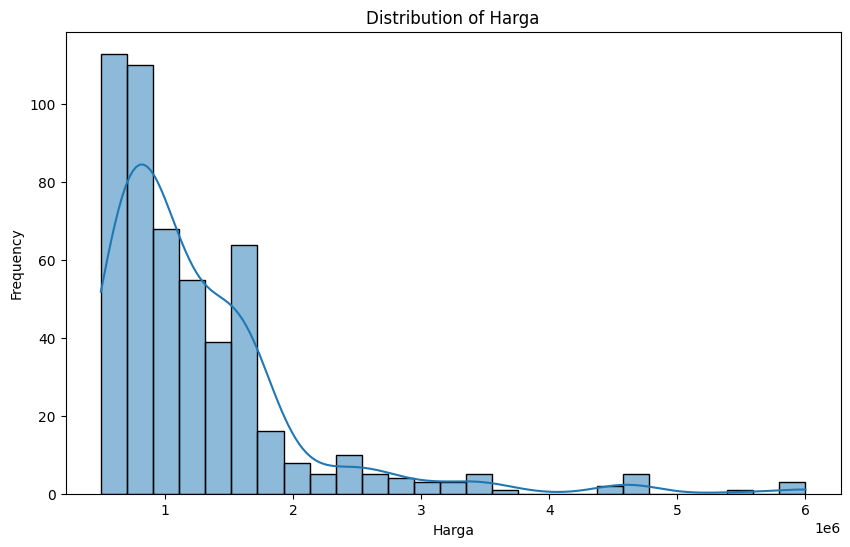

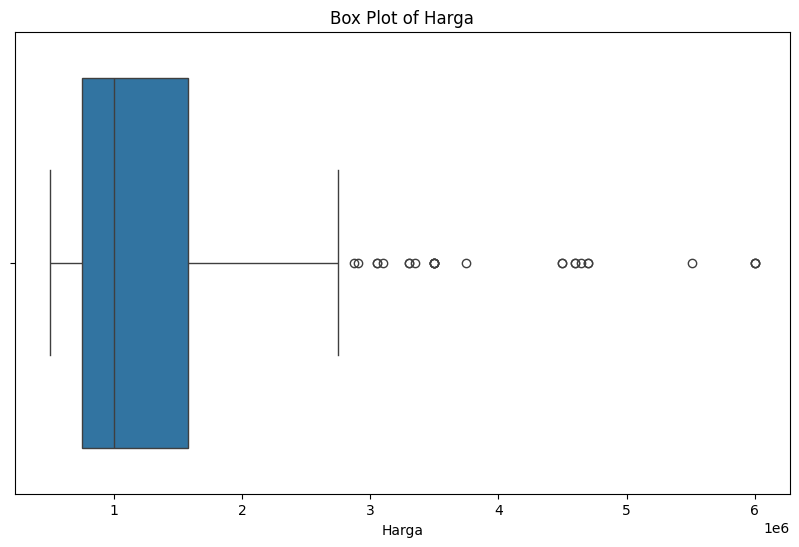

In [15]:
# print(df['harga'].isnull().sum())# 0
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['harga'], kde=True)  # KDE (Kernel Density Estimate) adds a density line
plt.title('Distribution of Harga')
plt.xlabel('Harga')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['harga'])
plt.title('Box Plot of Harga')
plt.xlabel('Harga')
plt.show()


In [17]:
# Apply a lambda function to remove the last word
df['nama'] = df['nama'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

# Display the modified DataFrame to verify the change
df


,nama,harga,panjang,lebar,Kloset Duduk,Laundry,Jemuran,Guling,WiFi,CCTV,...,Taman,Shower,Balcon,Ember mandi,Kursi,Wastafel,Parkir Mobil,Termasuk listrik,Jual Makanan,TV
0,Kost Apik Muh Unpar Tipe B Cidadap Bandung,975000,3.0,3.0,0,0,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
1,Kost Apik Ciumbuleuit 1 Tipe A Cidadap Bandung,725000,3.0,3.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,Kost Apik Theresia Home UNPAR Tipe A Cidadap B...,1875000,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,Kost Singgahsini Bukit Indah UNPAR Tipe B Cium...,1325000,3.5,3.5,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,Kost Apik Tirtasari Selatan Tipe A Sukasari Ba...,1275000,4.0,4.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Kost Sapphire Setiabudi Tipe C Parongpong Band...,1200000,3.0,4.0,1,1,0,1,1,0,...,0,1,0,1,0,1,1,1,0,1
516,Kost Ma Maison Tipe Standar Parongpong Bandung...,1500000,3.0,5.0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
517,Kost Ananda House Sukasari Bandung,1500000,3.0,3.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
518,Kost Alfi Tipe A Cidadap Bandung,800000,3.5,3.5,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
df.to_csv('mamikos clean.csv', index=False) 

In [20]:
df[df["harga"]>4000000]

,nama,harga,panjang,lebar,Kloset Duduk,Laundry,Jemuran,Guling,WiFi,CCTV,...,Taman,Shower,Balcon,Ember mandi,Kursi,Wastafel,Parkir Mobil,Termasuk listrik,Jual Makanan,TV
19,Kost J Residence VIP Cidadap Bandung,5508000,6.0,7.0,1,0,0,0,1,1,...,0,1,1,0,0,1,1,0,1,1
20,Kost J Residence Executive Cidadap Bandung,4647000,5.0,4.5,1,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
171,Kost Rumah Ciumbuleuit Pavilion Cidadap Bandung,6000000,3.0,4.0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
180,Kost Graha Ciumbuleuit Cidadap Bandung,4500000,3.0,3.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
221,Kost Dalem Arum Tipe Exclusive Cidadap Bandung,4600000,5.0,6.0,1,0,0,0,1,1,...,0,1,1,0,1,1,0,0,0,1
222,Kost Dalem Arum Tipe Exclusive Twin Cidadap Ba...,4700000,5.0,6.0,1,0,0,0,1,1,...,0,1,1,0,1,1,0,0,0,1
254,Kost Rumah Ciumbuleuit Pavilion Cidadap Bandung,6000000,3.0,4.0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
392,Kost Dalem Arum Tipe Exclusive Cidadap Bandung,4600000,5.0,6.0,1,0,0,0,1,1,...,0,1,1,0,1,1,0,0,0,1
393,Kost Dalem Arum Tipe Exclusive Twin Cidadap Ba...,4700000,5.0,6.0,1,0,0,0,1,1,...,0,1,1,0,1,1,0,0,0,1
486,Kost Rumah Ciumbuleuit Pavilion Cidadap Bandung,6000000,3.0,4.0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74e97299-34f5-42a3-943c-14f3db7a2f12' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>